<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bilingual-Evaluation-Understudy-Score-(BLEU)" data-toc-modified-id="Bilingual-Evaluation-Understudy-Score-(BLEU)-1">Bilingual Evaluation Understudy Score (BLEU)</a></span><ul class="toc-item"><li><span><a href="#1.-Quick-introduction-to-BLEU" data-toc-modified-id="1.-Quick-introduction-to-BLEU-1.1">1. Quick introduction to BLEU</a></span></li><li><span><a href="#2.-Calculating-BLEU-score-using-NLTK" data-toc-modified-id="2.-Calculating-BLEU-score-using-NLTK-1.2">2. Calculating BLEU score using NLTK</a></span></li><li><span><a href="#3.-Calculating-BLEU-score-manually" data-toc-modified-id="3.-Calculating-BLEU-score-manually-1.3">3. Calculating BLEU score manually</a></span><ul class="toc-item"><li><span><a href="#3.1-The-modified-precision" data-toc-modified-id="3.1-The-modified-precision-1.3.1">3.1 The modified precision</a></span></li><li><span><a href="#3.2-Calculate-modified-precision-for-your-sentence" data-toc-modified-id="3.2-Calculate-modified-precision-for-your-sentence-1.3.2">3.2 Calculate modified precision for your sentence</a></span></li><li><span><a href="#3.3-Brevity-penalty" data-toc-modified-id="3.3-Brevity-penalty-1.3.3">3.3 Brevity penalty</a></span></li></ul></li><li><span><a href="#4.-Limitations-of-the-BLEU-score" data-toc-modified-id="4.-Limitations-of-the-BLEU-score-1.4">4. Limitations of the BLEU score</a></span><ul class="toc-item"><li><span><a href="#4.1-Capitalisation-and-tokenisation" data-toc-modified-id="4.1-Capitalisation-and-tokenisation-1.4.1">4.1 Capitalisation and tokenisation</a></span></li><li><span><a href="#4.2-Syntactic-functions" data-toc-modified-id="4.2-Syntactic-functions-1.4.2">4.2 Syntactic functions</a></span></li></ul></li></ul></li><li><span><a href="#5.-Conclusions" data-toc-modified-id="5.-Conclusions-2">5. Conclusions</a></span></li></ul></div>

# Bilingual Evaluation Understudy Score (BLEU)

In Section 12.5.2 of the book we presented the BLEU score. As we explained there, this is the most used automatic evaluation metric in machine translation. Despite being proposed in 2002, it is still employed by researchers who develop machine translation systems. The method was introduced in:

> Kishore Papineni, Salim Roukos, Todd Ward, and Wei-Jing Zhu (2002) BLEU: a Method for Automatic Evaluation of Machine Translation. In *Proceedings of the 40th Annual Meeting of the Association for Computational Linguistics (ACL)*, Philadelphia, July 2002, pp. 311-318. https://www.aclweb.org/anthology/P02-1040/


The purpose of this notebook is to discuss the BLUE score further and provide technical details which could not covered in the book due to space restrictions. It also provides snippets of code in Python for those interested to find out how to calculate the BLEU score for their examples. Some basic understanding of Python is required to follow the explanation below. 

We start with a short description of the BLEU score to highlight the main points about the evaluation metric. However, this discussion is not mean to replace the information presented in Chapter 12 related to evaluation in machine translation.

## 1. Quick introduction to BLEU

The aim of the BLEU score is to compare automatically the output of an MT engine to one or several human produced translations. The output of MT is referred to as *hypothesis*, whilst the human translations are referred to as *references*. As we already know, there is more than one correct translation for a given source sentence. For this reason, it is not possible to have a word by word comparison between the hypothesis and the references. Instead the BLEU score relies on a modified precision metric to calculate the overlap in terms of ngrams between the hypothesis and references.

Usually, BLEU is calculated using ngrams of length from 1 to 4. This is referred to as BLEU-4. A weighting is assigned to each type of ngram, but usually an uniform distribution is used, where the weighting is 1/n. Given the way the score is calculated, it does not try to estimate the fluency or grammatical correctness of a translation directly. However, it was noted that unigram and bigram scores will largely capture the fidelity of the translation, whilst longer n-gram scores will account for fluency. 

The BLEU score is calculated using two parts:
- the modified precision of ngrams from hypothesis in references, discussed in Section 3.1
- brevity penalty (BP) which penalises translations which are significantly shorter than the references. This is discussed in Section 3.3.

The BLEU score is calculated as geometric mean over the test corpus’ modified precision scores multiplied by the brevity penalty factor. The formula used is:

$BLEU = BP \cdot \exp (\sum_{n=1}^{N}{w_n\log p_n} )$

In most of the cases, it is not necessary to know the formula to calculate the score because there are several software packages which can do that for you. We will start by showing how the BLEU score can be calculated using NLTK.
 

## 2. Calculating BLEU score using NLTK

To start, we will use the implementation of BLEU score from NLTK.

We first import the necessary module and calculate the BLEU score using NLTK. This can be done without the need to understand precisely how the score is calculated. The relevant module is imported using ``from nltk.translate import bleu_score as bleu`` and more information about it can be found at https://www.nltk.org/api/nltk.translate.html#module-nltk.translate.bleu_score.

In [1]:
from nltk.translate import bleu_score as bleu

For our experiments, we will use the examples from (Papineni et. al, 2002), which are also discussed in the book:
- Hypothesis (i.e. sentence produced by the MT engine): *the the the the the the the*
- Reference A (i.e. translation produced by the first translator): *the cat is on the mat*
- Reference B (i.e. translation produced by the second translator): *there is a cat on the mat*

We initialise three variables which contain the tokens of the sentences as a list. For the sake of simplicity, in this case we assume that the space is the token separator, so we can use the string method ``split`` to produce a list of tokens for each sentences, which is the expected format of the methods we will use. Please note that we do not capitalise of the first word in the sentence. We do this for the sake of simplicity. This is particularly important and we will discuss this later on.

In [2]:
hyp = 'the the the the the the the'.split()
ref_a = 'the cat is on the mat'.split()
ref_b = 'there is a cat on the mat'.split()

We will use the ``nltk.translate.bleu_score.sentence_bleu`` method to calculate the BLEU score at sentence level. This method takes a number of parameters, but we will discuss here only the first three ``references``, ``hypothesis``, and ``weights``. For the rest of the parameters the default values are a good starting point in most of the cases.
- the ``references`` parameter is a list of lists which contains the reference translation(s). Each inner list contains the tokens of one of the reference translations. In the example where we use only the first reference, the value of this parameter is ``[ref_a]``. If we use both references the value for this parameter will be ``[ref_a, ref_b]``. Please note that even if we provide only one reference, we still need to have a list of lists even though the outer list contains only one element. 
- the ``hypothesis`` parameter is a list which contains the tokens of the hypothesis. In the examples below we use the ``hyp`` variable.
- the ``weights`` parameter indicates the weights that is given to unigrams, bigrams and so on. The default behaviour of the implementation is to calculate the BLUE score for up to 4-grams using uniform weights (i.e. ``(0.25, 0.25, 0.25, 0.25)``). This BLEU score is sometimes called BLEU-4. If there is no match of ngrams for a given n (e.g. 3-grams and above), the BLEU score is zero. It is possible to use a smoothing function to avoid this, but we will not discuss it here. This smoothing function is one of the additional parameters which we do not discuss here. However, interested readers can find more details in the <a href="https://www.nltk.org/api/nltk.translate.html#module-nltk.translate.bleu_score" target="_blank">NLTK documentation</a>. If we want to calculate BLEU score up to 5-grams, we provide 5 values in the tuple. For uniform weights we would have ``(0.2, 0.2, 0.2, 0.2, 0.2)``. At the same time, if we want to use only unigrams, as in the examples discussed in the book, we can have a tuple with only one element (i.e. ``(1,)`` - keep in mind that the ``,`` is essential here because we have a tuple with only one element). For most of the discussion below, we will use unigrams. 

In the example below we calculate the BLEU score using each of the references individually and then together. In this particular case the best score is obtained when we use the first reference and there is no change of that score when we use both references. We will discuss this in the next section.

In [3]:
score_ref_a = bleu.sentence_bleu([ref_a], hyp, (1,) )
print(f"BLEU score for the hypothesis when using ref_a: {score_ref_a}")
score_ref_b = bleu.sentence_bleu([ref_b], hyp, (1,))
print(f"BLEU score for the hypothesis when using ref_b: {score_ref_b}")
score_ref_ab = bleu.sentence_bleu([ref_a, ref_b], hyp, (1,))
print(f"BLEU score for the hypothesis when using multiple refs: {score_ref_ab}")

BLEU score for the hypothesis when using ref_a: 0.2857142857142857
BLEU score for the hypothesis when using ref_b: 0.14285714285714285
BLEU score for the hypothesis when using multiple refs: 0.2857142857142857


## 3. Calculating BLEU score manually

We are now going to manually calculate the BLEU score manually, to explain how the values above were obtain. For this purpose we will use the code from NLTK to ensure the results are the same. 



### 3.1 The modified precision

The BLUE score is a precision-based metric. This means that it checks how many of the ngrams from the hypothesis are present in the reference. However, we cannot use the normal precision because the metric would be easily fooled. For example, for the hypothesis we have above the normal precision is 1 because every unigram from the hypothesis appears in the reference(s). For this reason, the BLEU score uses a modified precision which counts the maximum number of times an ngram appears in each of the references. This maximum number of times is used to limit the number of matches allowed. For example for Reference 1 we can count only two *the*s, which means that the precision score is 2/7. Note that we divide by the number of ngrams in the hypothesis, not reference. The reference is used only to determine the maximum number of matches.

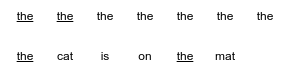

Let's have a look how this is calculated for our examples. We will use some of the code from the NLTK implementation to explain. We first import the necessary modules and initialise the variable ``n`` to 1, to work with unigrams. We will need the ``nltk`` module to produce ngrams and the ``Counter`` datatype to produce frequency lists easily. (You can read more about how to produce frequency lists in Python at https://dinel.org.uk/2019/11/07/how-to-create-word-frequency-lists-in-python/).

In [4]:
import nltk
from collections import Counter

n = 1 # change this number to work with bigrams (2), trigrams (3), and so on

We produce all the ngrams using ``nltk.ngrams`` and count them using ``Counter``. In our case we have unigrams and the hypothesis contains only the word *the* 7 times. However, if the hypothesis was *The cat is on the mat on the floor* and we wanted to have the bigrams we would have

```python
counts = Counter(nltk.ngrams("The cat is on the mat on the floor".split(), 2))
print(counts)

>> Counter({('on', 'the'): 2, ('The', 'cat'): 1, ('cat', 'is'): 1, ('is', 'on'): 1, ('the', 'mat'): 1, ('mat', 'on'): 1, ('the', 'floor'): 1})
```

We can see in the output that the bigram *on the* appears twice and all the other bigrams only once. 

If we go back to our example, we get the following lists of unigrams.

In [5]:
counts = Counter(nltk.ngrams(hyp, 1))
print(counts)

Counter({('the',): 7})


We now produce the list of ngrams for the first reference as well. We see that the word *the* appears only twice.

In [6]:
reference_counts = Counter(nltk.ngrams(ref_a, n))
print(reference_counts)

Counter({('the',): 2, ('cat',): 1, ('is',): 1, ('on',): 1, ('mat',): 1})


As we can see in the output above, the only ngram that the reference and hypothesis have in common is *the*. Because *the* appears only twice in the reference our modified precision gives a score of 2/7.

If we use the second reference, the result is lower because the maximum number of times we can count *the* in the second reference is 1. In this case, the score for modified precision is 1/7.

In [7]:
reference_counts = Counter(nltk.ngrams(ref_b, n))
print(reference_counts)

Counter({('there',): 1, ('is',): 1, ('a',): 1, ('cat',): 1, ('on',): 1, ('the',): 1, ('mat',): 1})


### 3.2 Calculate modified precision for your sentence

The following snippet of code adapted from the ``modified_precision`` implemented in NLTK (https://www.nltk.org/_modules/nltk/translate/bleu_score.html) gives you the opportunity to calculate the modified precision for your sentences. 

If you want to calculate the modified precision your sentences and using your parameters, you will need to change the following variables. As in the examples above, the tokenisation is done using space. You may want to use a better tokeniser like ``word_tokenize`` from NLTK (see more at <a href="https://www.nltk.org/_modules/nltk/tokenize.html#word_tokenize" target="_blank">https://www.nltk.org/_modules/nltk/tokenize.html#word_tokenize</a>).

In [8]:
# edit the following strings to experiment with your sentences
hyp = 'the the the the the the the'.split()
ref_a = 'the cat is on the mat'.split()
ref_b = 'there is a cat on the mat'.split()

# if you want you can add more references using the format above, but make sure you add them to the list below
references = [ref_a, ref_b]

# change n if you want to use sequences of tokens longer than unigrams
n = 1 

# change the following variable if you use sequences of tokens longer than unigrams
# for example for bigrams you will probably want to have (0.5, 0.5), for trigrams (1/3, 1/3, 1/3), for 4-grams (0.25, 0.25, 0.25, 0.25)
weights = (1, )

Once the variables are initialised, you will need to run the following snippet of code. If you want to do it outside this notebook, you can copy the code from the cell above and the one below in your favourite editor and run them as a script. You will need make sure you include the ``import``s from above. The code is a bit more complicated than what we had above because here we need to be able to process several references.

In [9]:
# Extracts all ngrams in hypothesis

# Set an empty Counter if hypothesis is empty.
counts = Counter(nltk.ngrams(hyp, n)) if len(hyp) >= n else Counter()
print("The frequency list of the hyphothesis is ", counts)

# process now the references
max_counts = {}
for reference in references:
    reference_counts = Counter(nltk.ngrams(reference, n)) if len(reference) >= n else Counter()
    for ngram in counts: max_counts[ngram] = max(max_counts.get(ngram, 0), reference_counts[ngram])

print("The maximum number of times we can count the ngrams from the hypothesis is ", max_counts)

# Assigns the intersection between hypothesis and references' counts.
# This dictionary comprehension is necessary because an ngram may appear more times in a reference than in a hypothesis
# In that case we will need to use only the number of times it appears in the hypothesis
clipped_counts = {
    ngram: min(count, max_counts[ngram]) for ngram, count in counts.items()
}
numerator = sum(clipped_counts.values())
denominator = max(1, sum(counts.values()))
print("The modified precision for is", numerator/denominator)

The frequency list of the hyphothesis is  Counter({('the',): 7})
The maximum number of times we can count the ngrams from the hypothesis is  {('the',): 2}
The modified precision for is 0.2857142857142857


### 3.3 Brevity penalty

The BLEU score penalises translations which are shorter than the reference. This is necessary because if the hypothesis contains only the word *the*, the modified precision score is very likely to be 1 because nearly any reference will contain the word *the* at least once. No penalty is introduced if the hypothesis is longer than the reference because it is assumed that the score is reduced enough as a result of the ngrams from the hypothesis which cannot be matched in the reference. 

The brevity penalty (BP) is calculated using $e^{1-\frac{r}{h}}$, where ``r`` is the length in tokens of the reference and ``h`` is the length in tokens of the hypothesis. If there are several references available, the one with closest length is selected. 

In the example below, we show how the length of the hypothesis impacts on the brevity penalty and the BLEU score. We will use for reference the sentence *the cat is on the mat* and for hypothesis we will have an increasing number of <em>the</em>s. We start with one occurrence of the word *the* and increase the length of the hypothesis till the sentence contains the word *the* eight times. 

In [12]:
ref = 'the cat is on the mat'.split()

import math

print("Len hyp\t\tBrevity penalty\t\tModified precision\tBLEU score")
print("-" * 75)
for i in [1, 2, 3, 4, 5, 6, 7, 8]:
    hyp = ['the'] * i
    score_ref_a = bleu.sentence_bleu([ref], hyp, (1,) )
    modified_precision = float(bleu.modified_precision([ref], hyp, n=1))
    brevity_penalty = math.exp(1 - len(ref) / len(hyp)) if len(hyp) < len(ref) else 1
    print(f"{i:4d}\t\t{brevity_penalty:11.5f}\t\t{modified_precision:10.5f}\t\t{score_ref_a:10.5f}")

Len hyp		Brevity penalty		Modified precision	BLEU score
---------------------------------------------------------------------------
   1		    0.00674		   1.00000		   0.00674
   2		    0.13534		   1.00000		   0.13534
   3		    0.36788		   0.66667		   0.24525
   4		    0.60653		   0.50000		   0.30327
   5		    0.81873		   0.40000		   0.32749
   6		    1.00000		   0.33333		   0.33333
   7		    1.00000		   0.28571		   0.28571
   8		    1.00000		   0.25000		   0.25000


As we can see in the table above, the highest penalty is when the hypothesis contains only one word *the* and decreases as the length of the hypothesis increases. Remember that in order to obtain the BLUE score, we have to multiply the brevity penalty with the modified precision. Given that BP is always between 0 and 1, this means that a lower score for the brevity penalty translates into a bigger penalty of the BLEU score. Once the length of the hypothesis reaches the length of the reference (6 in this case), the brevity penalty is 1 and does not change. Because of the multiplication, this means no penalty is applied to the modified precision. 

In the table we also included the value for the modified precision and the final BLUE score. In order to keep the code short, we calculated these using the methods provided by NLTK. Interestingly enough, the highest score is obtained when the hypothesis has the correct length, despite not being informative at all. This shows the importance of brevity penalty.

As we mentioned before, when the hypothesis is longer than the reference the value of brevity penalty is 1 (i.e. no penalty) because the modified precision reduces the BLEU score. This can be seen in the results above for the hypotheses with 7 and 8 tokens.


## 4. Limitations of the BLEU score

The BLEU score is not only widely used, but also widely criticised. Most of the critism is directed towards the fact that the comparison between the hypothesis and references is made at token level. This means that a mismatch of a function word is treated exactly the same way as a difference in a content word. In addition, BLEU does not take into consideration the sentence structure which can lead to strange situations when there is a match in the ngrams, but they serve completely different syntactic roles. In this section, we show a few examples to make the reader aware of the limitations of BLEU.

### 4.1 Capitalisation and tokenisation

Given that the comparison is done between ngrams, the way the input is preprocessed is very important. In section 2, we mention that we do not capitalise the first word in sentences. The way we deal with capitalisation is very important. In the example below the BLEU score is higher if we use ``ref_a`` instead of ``ref_b`` because with the first reference we can match two <em>the</em>s, whilst with the second there is only one lower case *the*.

In [13]:
ref_a = 'the cat is on the mat'.split()
ref_b = 'The cat is on the mat'.split()
hyp = 'the the the the the the the'.split()

print("Score when we have the token the twice:", bleu.sentence_bleu([ref_a], hyp, (1,) ))
print("Score when we have the token the once:", bleu.sentence_bleu([ref_b], hyp, (1,) ))

Score when we have the token the twice: 0.2857142857142857
Score when we have the token the once: 0.14285714285714285


The way tokenisation is applied to a sentence also influences the results of the BLEU score. In the examples below we have five hypotheses (hyp_1-hyp_5), which say more or less the same as the reference. Hypotheses 1 and 2, say exactly the same thing as the reference, but using different contractions for *he is not*. Hypotheses 3 and 5 paraphrase the reference, and BLEU seems to correctly identify the case where the hypothesis is the closest to the reference (hypothesis 3). Scaringly enough, the highest score is obtained by hypothesis 6 which says exactly the opposite to the reference. In all these cases we use BLUE-4 which is the default for ``bleu.sentence_bleu`` if no weights are provided. 

In [14]:
ref = "He is not happy he is not going to cinema"
hyp_1 = "He isn 't happy he isn 't going to cinema"
hyp_2 = "He 's not happy he 's not going to cinema"
hyp_3 = "He is unhappy he is not going to cinema"
hyp_4 = "He 's not happy he 's not going to the movies"
hyp_5 = "He is not happy he is staying home"
hyp_6 = "He is happy he is not going to cinema"

print("Hyp_1:", bleu.sentence_bleu([ref], hyp_1))
print("Hyp_2:", bleu.sentence_bleu([ref], hyp_2))
print("Hyp_3:", bleu.sentence_bleu([ref], hyp_3))
print("Hyp_4:", bleu.sentence_bleu([ref], hyp_4))
print("Hyp_5:", bleu.sentence_bleu([ref], hyp_5))
print("Hyp_6:", bleu.sentence_bleu([ref], hyp_6))

Hyp_1: 0.7888119293172784
Hyp_2: 0.8696160820399262
Hyp_3: 0.8656098697665126
Hyp_4: 0.665126048082759
Hyp_5: 0.5993999480037718
Hyp_6: 0.8776467090813088


Hypothesis 6 exemplifies a very serious problem that BLEU can cause in cases where changing a word in a sentence changes the meaning of this sentence completely. One of these cases is translation of sentiment as discussed in 

> Saadany, H., Orasan, C., Mohamed, E., and Tantawy, A. (2021) Sentiment-Aware Measure (SAM) for Evaluating Sentiment Transfer by Machine Translation Systems. In *Proceedings of Recent Advances in Natural Language Processing*, pages 1217–1226, Sep 1–3, 2021. https://arxiv.org/abs/2109.14895

Different tokenisations and normalisations applied to references and hypotheses make it difficult to compare the results of different MT systems. For example representing the diacritics differently in the reference and hypothesis leads to a reduction of the BLEU score, and the removal of diacritics increases the score as discuss in https://twitter.com/prajdabre1/status/1422809646645972993:

<blockquote class="twitter-tweet" data-theme="dark"><p lang="en" dir="ltr">Can anyone explain why English to Romanian translation is evaluated after removing diacritics in Romanian? Seems like an easy way to boost BLEU scores by 7 points :/ <a href="https://twitter.com/hashtag/NLProc?src=hash&amp;ref_src=twsrc%5Etfw">#NLProc</a></p>&mdash; Raj Dabre (@prajdabre1) <a href="https://twitter.com/prajdabre1/status/1422809646645972993?ref_src=twsrc%5Etfw">August 4, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

One solution to the problems introduced by different tokenisation and normalisation is proposed in

> Post, M. (2018). A Call for Clarity in Reporting BLEU Scores. In *Proceedings of the Third Conference on Machine Translation: Research Papers*, 186–191. https://doi.org/10.18653/v1/W18-6319

who argues that there should be more transparency when reporting the BLEU results and that the same tools should be used to calculate the BLEU score. He developed SacreBLEU (https://github.com/mjpost/sacrebleu) to address this problem. 

### 4.2 Syntactic functions

In the example below the first hypothesis receives a higher score than the second even though it has a completely different meaning than the reference. In this case we use unigrams and bigram for scoring.

In [15]:
ref = "the dog is chasing the cat".split()
hyp1 = "the cat is chasing the dog".split()
hyp2 = "the cat is chased by the dog".split()

print("Hyp_1:", bleu.sentence_bleu([ref], hyp1, (0.5, 0.5) ))
print("Hyp_1:", bleu.sentence_bleu([ref], hyp2, (0.5, 0.5) ))

Hyp_1: 0.8944271909999159
Hyp_1: 0.48795003647426655


This shows another limitation of the BLEU score which can be easily fouled by active voice-pasive voice difference. 

# 5. Conclusions

The BLUE score is still widely used in evaluation of machine translation. In this notebook we explained how it is calculated and which are its limitations.

The discussion about the BLEU score was in the context of evaluation of machine translation. However, BLEU score is widely employed in a variety of tasks which include generation of text like image captioning and text simplification. BLEU has also inspired metrics like the ROUGE score which is commonly used in automatic text summarisation. In contrast to BLEU, which is a precision based metric, the ROUGE score is recall based. More information about the ROUGE score can be found in 

> Lin, Chin-Yew (2004) ROUGE: A Package for Automatic Evaluation of Summaries. In *Proceedings of the Workshop on Text Summarization Branches Out*, Barcelona, Spain, 25 - 26 July 2004, pp. 74–81. https://www.aclweb.org/anthology/W04-1013/